In [47]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Data = pd.read_csv(r'C:\Users\abdul\ENDG 319\diabetes-dataset.csv', index_col = False)
Data = Data.rename({'Outcome': 'diabetes'}, axis = 1)
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [48]:
df = Data.iloc[:, [1, 2, 4, 5, 8]]
dfX = df.drop(columns = ['diabetes'])
sy = df.diabetes

In [49]:
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy, random_state = 15)
dfX_train.to_numpy()

array([[107. ,  62. ,  74. ,  36.6],
       [194. ,  68. ,   0. ,  35.9],
       [ 89. ,  74. ,  85. ,  30.4],
       ...,
       [155. ,  62. , 495. ,  34. ],
       [129. ,  68. , 125. ,  38.5],
       [ 94. ,  68. ,  76. ,  26. ]])

In [50]:
from sklearn import preprocessing
n1 = preprocessing.MinMaxScaler()
X_train = n1.fit_transform(dfX_train.to_numpy())
X_test = n1.fit_transform(dfX_test.to_numpy())

In [51]:
from sklearn.neighbors import KNeighborsClassifier
i = 1
score = []
while i <= 250:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_train = knn.fit(X_train, sy_train)
    knn_test = knn.fit(X_test, sy_test)
    score.append([i, knn.score(X_train, sy_train), knn.score(X_test, sy_test)])
    i += 1

In [52]:
df_score = pd.DataFrame(score, columns = ['k', 'train_score', 'test_score'])
df_score

,k,train_score,test_score
0,1,0.742000,1.000
1,2,0.712667,0.892
2,3,0.744667,0.876
3,4,0.720000,0.840
4,5,0.728667,0.816
...,...,...,...
245,246,0.647333,0.690
246,247,0.647333,0.690
247,248,0.647333,0.690
248,249,0.647333,0.690


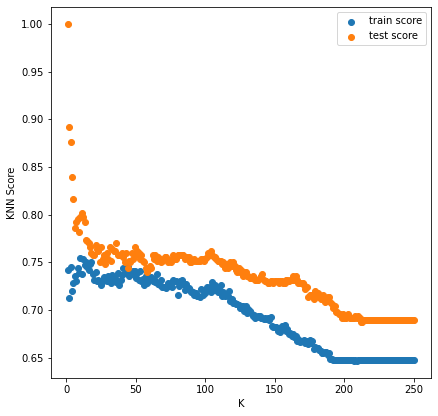

In [53]:
test_score = df_score.iloc[:, 2]
train_score = df_score.iloc[:, 1]
k = df_score.iloc[:, 0]

fig, axs = plt.subplots(figsize = (15, 15))

axs1 = plt.subplot2grid(shape = (2, 2), loc = (0, 0))

axs1.scatter(k, train_score, label = 'train score')
axs1.scatter(k, test_score, label = 'test score')
axs1.set_xlabel("K")
axs1.set_ylabel("KNN Score")
axs1.legend()

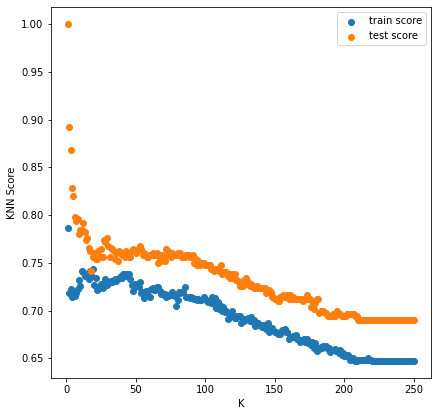

In [54]:
n1 = preprocessing.StandardScaler()
X_train = n1.fit_transform(dfX_train.to_numpy())
X_test = n1.fit_transform(dfX_test.to_numpy())

i = 1
score = []
while i <= 250:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_train = knn.fit(X_train, sy_train)
    knn_test = knn.fit(X_test, sy_test)
    score.append([i, knn.score(X_train, sy_train), knn.score(X_test, sy_test)])
    i += 1

df_score = pd.DataFrame(score, columns = ['k', 'train_score', 'test_score'])

test_score = df_score.iloc[:, 2]
train_score = df_score.iloc[:, 1]
k = df_score.iloc[:, 0]

fig, axs = plt.subplots(figsize = (15, 15))

axs1 = plt.subplot2grid(shape = (2, 2), loc = (0, 0))

axs1.scatter(k, train_score, label = 'train score')
axs1.scatter(k, test_score, label = 'test score')
axs1.set_xlabel("K")
axs1.set_ylabel("KNN Score")
axs1.legend()

In [56]:
i = 30
score = []
while i in range(30, 51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_train = knn.fit(X_train, sy_train)
    knn_test = knn.fit(X_test, sy_test)
    score.append([i, knn.score(X_train, sy_train), knn.score(X_test, sy_test)])
    i += 1
    
df_score = pd.DataFrame(score, columns = ['k', 'train_score', 'test_score'])
df_score

,k,train_score,test_score
0,30,0.728667,0.768
1,31,0.730000,0.756
2,32,0.730667,0.766
3,33,0.730000,0.764
4,34,0.731333,0.762
5,35,0.732667,0.754
6,36,0.731333,0.760
7,37,0.733333,0.752
8,38,0.734000,0.762
9,39,0.736000,0.760


In [59]:
knn = KNeighborsClassifier(n_neighbors = 43)
knn_train = knn.fit(X_train, sy_train)
knn_test = knn.fit(X_test, sy_test)

In [60]:
y_pred = knn.predict(X_test)
df_y_pred = pd.DataFrame(data=y_pred)

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
unique_labels(sy_test)

labels = unique_labels(sy_test)
column = [f'Predicted {label}' for label in labels]
indices = [f'Actual {label}' for label in labels]
table = pd.DataFrame(confusion_matrix(sy_test, df_y_pred), columns=column, index=indices)

table

,Predicted 0,Predicted 1
Actual 0,326,19
Actual 1,100,55


In [65]:
new_test_data = np.array([[100, 70, 200, 40]])
X_new = n1.transform(new_test_data)
knn.predict(X_new)

array([0], dtype=int64)